In [1]:
import pandas as pd
df=pd.read_csv("Titanic Disaster Dataset.csv")
df.head()

,PassengerId,PClass,Gender,Sibling,Embarked,Survived
0,1,3,male,1,S,0
1,2,1,female,1,C,1
2,3,3,female,0,S,1
3,4,1,female,1,S,1
4,5,3,male,0,S,0


In [2]:
df=df[df.Sibling<4]
df=df[df.Sibling>=0]
df=df[df.Embarked!=None]
df=df[df.Gender!=None]
df=df[df.PClass<4]
df=df[df.PClass>=1]
df=df[df.Survived!=None]
df

,PassengerId,PClass,Gender,Sibling,Embarked,Survived
0,1,3,male,1,S,0
1,2,1,female,1,C,1
2,3,3,female,0,S,1
3,4,1,female,1,S,1
4,5,3,male,0,S,0
...,...,...,...,...,...,...
1304,1305,3,male,0,S,0
1305,1306,1,female,0,C,1
1306,1307,3,male,0,S,0
1307,1308,3,male,0,S,0


In [3]:
Input=df.drop("Survived",axis="columns")
Target=df["Survived"]

In [4]:
Input

,PassengerId,PClass,Gender,Sibling,Embarked
0,1,3,male,1,S
1,2,1,female,1,C
2,3,3,female,0,S
3,4,1,female,1,S
4,5,3,male,0,S
...,...,...,...,...,...
1304,1305,3,male,0,S
1305,1306,1,female,0,C
1306,1307,3,male,0,S
1307,1308,3,male,0,S


In [5]:
Target

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1272, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_gender=LabelEncoder()

In [8]:
Input["new_Gender"]=le_gender.fit_transform(Input["Gender"])
Input.head()

,PassengerId,PClass,Gender,Sibling,Embarked,new_Gender
0,1,3,male,1,S,1
1,2,1,female,1,C,0
2,3,3,female,0,S,0
3,4,1,female,1,S,0
4,5,3,male,0,S,1


In [9]:
dumies=pd.get_dummies(Input.Embarked)

In [10]:
dumies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [11]:
merged=pd.concat([Input,dumies],axis="columns")

In [12]:
merged

,PassengerId,PClass,Gender,Sibling,Embarked,new_Gender,C,Q,S
0,1,3,male,1,S,1,0,0,1
1,2,1,female,1,C,0,1,0,0
2,3,3,female,0,S,0,0,0,1
3,4,1,female,1,S,0,0,0,1
4,5,3,male,0,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,S,1,0,0,1
1305,1306,1,female,0,C,0,1,0,0
1306,1307,3,male,0,S,1,0,0,1
1307,1308,3,male,0,S,1,0,0,1


In [13]:
final=merged.drop(["PassengerId","Gender","Embarked","S"],axis="columns")
final.head()

,PClass,Sibling,new_Gender,C,Q
0,3,1,1,0,0
1,1,1,0,1,0
2,3,0,0,0,0
3,1,1,0,0,0
4,3,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
final_train,final_test,target_train,target_test=train_test_split(final,Target,test_size=0.2)

In [16]:
final_train.head()

,PClass,Sibling,new_Gender,C,Q
1163,1,1,0,1,0
242,2,0,1,0,0
1264,2,0,1,0,0
1188,3,2,1,1,0
1001,2,0,1,1,0


In [17]:
final_test.head()

,PClass,Sibling,new_Gender,C,Q
14,3,0,0,0,0
311,1,2,0,1,0
883,2,0,1,0,0
701,1,0,1,0,0
116,3,0,1,0,1


In [18]:
target_train.head()

1163    1
242     0
1264    0
1188    0
1001    0
Name: Survived, dtype: int64

In [19]:
target_test.head()

14     0
311    1
883    0
701    1
116    0
Name: Survived, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
model0=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
from sklearn.svm import SVC
model2=SVC()
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model6=LinearDiscriminantAnalysis()
from sklearn.linear_model import SGDClassifier
model7=SGDClassifier()
from sklearn.neural_network import MLPClassifier
model8=MLPClassifier()
from sklearn.naive_bayes import BernoulliNB
model9=BernoulliNB()

In [21]:
scores=[]

In [22]:
model0.fit(final_train,target_train)
rsvLR=model0.score(final_test,target_test)
scores.append(rsvLR)
rsvLR

0.8352941176470589

In [23]:
model1.fit(final_train,target_train)
rsvRF=model1.score(final_test,target_test)
scores.append(rsvRF)
rsvRF

0.8392156862745098

In [24]:
model2.fit(final_train,target_train)
rsvSVM=model2.score(final_test,target_test)
scores.append(rsvSVM)
rsvSVM

0.8392156862745098

In [25]:
model3.fit(final_train,target_train)
rsvDT=model3.score(final_test,target_test)
scores.append(rsvDT)
rsvDT

0.8392156862745098

In [26]:
model4.fit(final_train,target_train)
rsvKN=model4.score(final_test,target_test)
scores.append(rsvKN)
rsvKN

0.807843137254902

In [27]:
model5.fit(final_train,target_train)
rsvNB=model5.score(final_test,target_test)
scores.append(rsvNB)
rsvNB

0.8352941176470589

In [28]:
model6.fit(final_train,target_train)
rsvDA=model6.score(final_test,target_test)
scores.append(rsvDA)
rsvDA

0.8352941176470589

In [29]:
model7.fit(final_train,target_train)
rsvSGD=model7.score(final_test,target_test)
scores.append(rsvSGD)
rsvSGD

0.8352941176470589

In [30]:
model8.fit(final_train,target_train)
rsvMLP=model8.score(final_test,target_test)
scores.append(rsvMLP)
rsvMLP

C:\Users\Haseeb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8392156862745098

In [31]:
model9.fit(final_train,target_train)
rsvBNB=model9.score(final_test,target_test)
scores.append(rsvBNB)
rsvBNB

0.8352941176470589

In [32]:
scores

[0.8352941176470589,
 0.8392156862745098,
 0.8392156862745098,
 0.8392156862745098,
 0.807843137254902,
 0.8352941176470589,
 0.8352941176470589,
 0.8352941176470589,
 0.8392156862745098,
 0.8352941176470589]

In [33]:
Models_collection=[]
Models_collection.append(model0)
Models_collection.append(model1)
Models_collection.append(model2)
Models_collection.append(model3)
Models_collection.append(model4)
Models_collection.append(model5)
Models_collection.append(model6)
Models_collection.append(model7)
Models_collection.append(model8)
Models_collection.append(model9)

In [34]:
Models_collection

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', 

In [35]:
def model_selection(Score):
    i=0
    for j in range(len(Score)-1):
        if Score[i]<Score[j]:
            i=j
    return i

In [36]:
Best_rsv_model=model_selection(scores)
Best_rsv_model

1

In [37]:
Models_collection[Best_rsv_model]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictLR=model0.predict(final_test)
predictRF=model1.predict(final_test)
predictSVM=model2.predict(final_test)
predictDT=model3.predict(final_test)
predictKN=model4.predict(final_test)
predictNB=model5.predict(final_test)
predictDA=model6.predict(final_test)
predictSGD=model7.predict(final_test)
predictMLP=model8.predict(final_test)
predictBNB=model9.predict(final_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
Accuracy_Collection=[]

In [41]:
def get_stats(trueVal,predicted):
    cm=confusion_matrix(trueVal,predicted)
    print("Confusion Matrix of model")
    print(cm)
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.figure(figsize=(5,2.5))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    a=cm[0][0]
    b=cm[0][1]
    c=cm[1][0]
    d=cm[1][1]
    Baseline=(max(a+b,c+d))/(a+b+c+d)
    print("Model's baseline is:", Baseline)
    Acuracy=(a+d)/(a+b+c+d)
    Accuracy_Collection.append(Acuracy)
    print("Model's accuracy is:", Acuracy)
    Recall=(d)/(c+d)
    print("Model's recall is:", Recall)
    Precision=(d)/(b+d)
    print("Model's precision is:", Precision)
    f1=(2*Precision*Recall)/(Precision+Recall)
    print("Model's F1 is:", f1)

Confusion Matrix of model
[[137  21]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8352941176470589
Model's recall is: 0.7835051546391752
Model's precision is: 0.7835051546391752
Model's F1 is: 0.7835051546391752


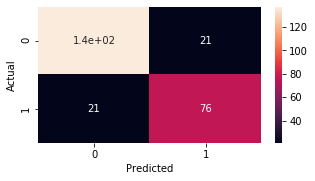

In [42]:
get_stats(target_test,predictLR)

Confusion Matrix of model
[[139  19]
 [ 22  75]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8392156862745098
Model's recall is: 0.7731958762886598
Model's precision is: 0.7978723404255319
Model's F1 is: 0.7853403141361256


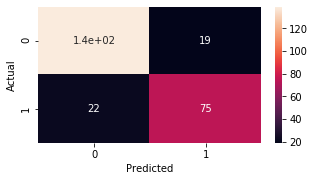

In [43]:
get_stats(target_test,predictRF)

Confusion Matrix of model
[[138  20]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8392156862745098
Model's recall is: 0.7835051546391752
Model's precision is: 0.7916666666666666
Model's F1 is: 0.7875647668393783


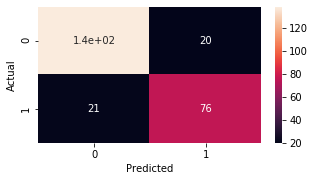

In [44]:
get_stats(target_test,predictSVM)

Confusion Matrix of model
[[139  19]
 [ 22  75]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8392156862745098
Model's recall is: 0.7731958762886598
Model's precision is: 0.7978723404255319
Model's F1 is: 0.7853403141361256


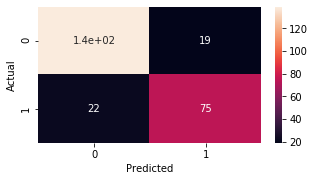

In [45]:
get_stats(target_test,predictDT)

Confusion Matrix of model
[[145  13]
 [ 36  61]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.807843137254902
Model's recall is: 0.6288659793814433
Model's precision is: 0.8243243243243243
Model's F1 is: 0.7134502923976608


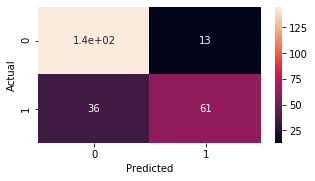

In [46]:
get_stats(target_test,predictKN)

Confusion Matrix of model
[[137  21]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8352941176470589
Model's recall is: 0.7835051546391752
Model's precision is: 0.7835051546391752
Model's F1 is: 0.7835051546391752


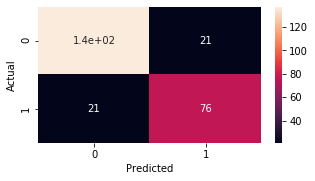

In [47]:
get_stats(target_test,predictNB)

Confusion Matrix of model
[[137  21]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8352941176470589
Model's recall is: 0.7835051546391752
Model's precision is: 0.7835051546391752
Model's F1 is: 0.7835051546391752


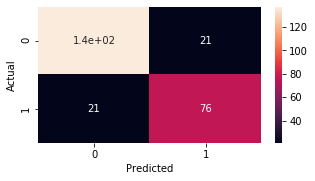

In [48]:
get_stats(target_test,predictDA)

Confusion Matrix of model
[[137  21]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8352941176470589
Model's recall is: 0.7835051546391752
Model's precision is: 0.7835051546391752
Model's F1 is: 0.7835051546391752


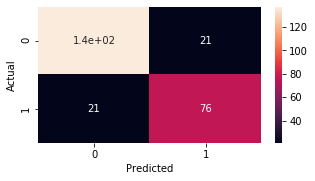

In [49]:
get_stats(target_test,predictSGD)

Confusion Matrix of model
[[138  20]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8392156862745098
Model's recall is: 0.7835051546391752
Model's precision is: 0.7916666666666666
Model's F1 is: 0.7875647668393783


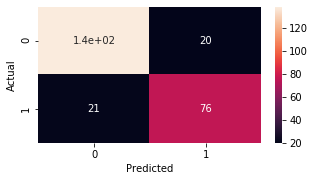

In [50]:
get_stats(target_test,predictMLP)

Confusion Matrix of model
[[137  21]
 [ 21  76]]
Model's baseline is: 0.6196078431372549
Model's accuracy is: 0.8352941176470589
Model's recall is: 0.7835051546391752
Model's precision is: 0.7835051546391752
Model's F1 is: 0.7835051546391752


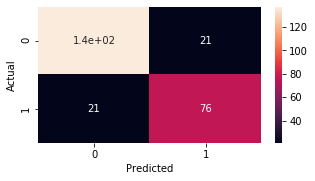

In [51]:
get_stats(target_test,predictBNB)

In [52]:
Accuracy_Collection

[0.8352941176470589,
 0.8392156862745098,
 0.8392156862745098,
 0.8392156862745098,
 0.807843137254902,
 0.8352941176470589,
 0.8352941176470589,
 0.8352941176470589,
 0.8392156862745098,
 0.8352941176470589]

In [53]:
def model_selection_AccuracyBase(Accuracy):
    i=0
    for j in range(len(Accuracy)-1):
        if Accuracy[i]<Accuracy[j]:
            i=j
    return i

In [54]:
Best_Model=model_selection_AccuracyBase(Accuracy_Collection)
Best_Model

1

In [55]:
Models_collection[Best_Model]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
Models_collection[Best_Model].fit(final,Target)
Models_collection[Best_Model].score(final,Target)

0.8655660377358491

In [57]:
def predictions():
    PClass=input("Please enter the PClass (1,2,3):")
    if(int(PClass)<1 or int(PClass)>3):
        print("Wrong PClass entered.")
        predictions()
    Gender=input("Please enter gender (Male/Female):")
    if(Gender!="Male" and Gender!="Female" and Gender!="male" and Gender!="female"):
        print("Wrong Gender entered.")
        predictions()
    Siblings=input("Please enter number of Siblings (0,1,2,3):")
    if(int(Siblings)<0 or int(Siblings)>3):
        print("Wrong siblings number entered.")
        predictions()
    Embarked=input("Enter Embarked value (C,S,Q):")
    if(Embarked!='C' and Embarked!='S' and Embarked!='Q' and Embarked!='s' and Embarked!='c' and Embarked!='q'):
        print("Wrong Embarked value is entered.")
        predictions()
    if(Gender=="Male" or Gender=="male"):
        Gender=1
    else:
        Gender=0
    C=0
    Q=0
    if(Embarked=='S' or Embarked=='s'):
        C=0
        Q=0
    elif(Embarked=='C' or Embarked=='c'):
        C=1
        Q=0
    else:
        Q=1
        C=0
    PredictedVal=Models_collection[Best_Model].predict([[PClass,Siblings,Gender,C,Q]])
    if(PredictedVal==1):
        print("The person Survived.")
    else:
        print("The person not Survived.")

In [58]:
def predictor(P,G,S,E):
    PClass=int(P)
    Gender=G
    Siblings=int(S)
    Embarked=E
    if(Gender=="Male" or Gender=="male"):
        Gender=1
    else:
        Gender=0
    C=0
    Q=0
    if(Embarked=='S' or Embarked=='s'):
        C=0
        Q=0
    elif(Embarked=='C' or Embarked=='c'):
        C=1
        Q=0
    else:
        Q=1
        C=0
    PredictedVal=Models_collection[Best_Model].predict([[PClass,Siblings,Gender,C,Q]])
    return PredictedVal

In [59]:
from tkinter import *
from tkinter.ttk import *
window=Tk()
window.title("Titanic Disaster Predictor")
window.geometry('500x300')
lb1=Label(window,text="Select Values of attributes",font=("Times New Roman",14))
lb1.grid(column=0,row=0)
lb2=Label(window,text="PClass",font=("Times New Roman",12))
lb2.grid(column=2,row=2)
combo=Combobox(window)
combo['values']=(1,2,3)
combo.current(1)
combo.grid(column=2,row=3)
lb3=Label(window,text="Gender",font=("Times New Roman",12))
lb3.grid(column=2,row=4)
combo1=Combobox(window)
combo1['values']=("Male","Female")
combo1.current(1)
combo1.grid(column=2,row=5)
lb4=Label(window,text="Siblings",font=("Times New Roman",12))
lb4.grid(column=2,row=6)
combo2=Combobox(window)
combo2['values']=(0,1,2,3)
combo2.current(1)
combo2.grid(column=2,row=7)
lb4=Label(window,text="Embarked",font=("Times New Roman",12))
lb4.grid(column=2,row=8)
combo3=Combobox(window)
combo3['values']=('C','S','Q')
combo3.current(1)
combo3.grid(column=2,row=9)
lb=Label(window)
def clicked():
    global lb
    lb.destroy()
    p=combo.get()
    g=combo1.get()
    s=combo2.get()
    e=combo3.get()
    predict=predictor(p,g,s,e)
    if(predict==1):
        lb=Label(window,text="Hooray,Person Survived!",font=("Times New Roman",14))
        lb.grid(column=2,row=12)
    else:
        lb=Label(window,text="Alas,Person not Survived!",font=("Times New Roman",14))
        lb.grid(column=2,row=12)
btn=Button(window,text="Predict",command=clicked)
btn.grid(column=2,row=10)
window.mainloop()

In [61]:
model8.predict([[1,0,1,0,0]])

array([0], dtype=int64)